In [5]:
import pandas as pd

url=r'\\192.168.0.115\d\MachineLearning\Data\pimaindian.txt'
cname = ['preg','plas','pres','skin','test','mass','pedi','age','class']
data=pd.read_csv(url,names=cname)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
type(data)

pandas.core.frame.DataFrame

In [9]:
print(data.shape)


(768, 9)


In [10]:
print(data.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [11]:
pd.set_option ('precision',2)
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [12]:
help(pd.set_option)

Help on CallableDynamicDoc in module pandas.core.config object:

class CallableDynamicDoc(builtins.object)
 |  CallableDynamicDoc(func, doc_tmpl)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwds)
 |      Call self as a function.
 |  
 |  __init__(self, func, doc_tmpl)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [13]:
class_counts=data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


In [14]:
print(data.corr(method='pearson'))


       preg  plas  pres  skin  test  mass  pedi   age  class
preg   1.00  0.13  0.14 -0.08 -0.07  0.02 -0.03  0.54   0.22
plas   0.13  1.00  0.15  0.06  0.33  0.22  0.14  0.26   0.47
pres   0.14  0.15  1.00  0.21  0.09  0.28  0.04  0.24   0.07
skin  -0.08  0.06  0.21  1.00  0.44  0.39  0.18 -0.11   0.07
test  -0.07  0.33  0.09  0.44  1.00  0.20  0.19 -0.04   0.13
mass   0.02  0.22  0.28  0.39  0.20  1.00  0.14  0.04   0.29
pedi  -0.03  0.14  0.04  0.18  0.19  0.14  1.00  0.03   0.17
age    0.54  0.26  0.24 -0.11 -0.04  0.04  0.03  1.00   0.24
class  0.22  0.47  0.07  0.07  0.13  0.29  0.17  0.24   1.00


In [15]:
print(data.skew())

preg     0.90
plas     0.17
pres    -1.84
skin     0.11
test     2.27
mass    -0.43
pedi     1.92
age      1.13
class    0.64
dtype: float64


In [17]:
print(data.kurt())

preg     0.16
plas     0.64
pres     5.18
skin    -0.52
test     7.21
mass     3.29
pedi     5.59
age      0.64
class   -1.60
dtype: float64


In [18]:
import pandas as pd

lf = pd.DataFrame({'key':range(5),'leftvalue':['a','b','c','d','e']})
rf = pd.DataFrame({'key':range(2,7),'rightvalue':['f','g','h','h','i']})

print(lf)
print('\n')
print(rf)

   key leftvalue
0    0         a
1    1         b
2    2         c
3    3         d
4    4         e


   key rightvalue
0    2          f
1    3          g
2    4          h
3    5          h
4    6          i


In [19]:
pd.merge(lf,rf,on='key',how='inner')

,key,leftvalue,rightvalue
0,2,c,f
1,3,d,g
2,4,e,h


In [22]:
pd.merge(lf,rf,on='key',how='left')

,key,leftvalue,rightvalue
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


In [23]:
pd.merge(lf,rf,on='key',how='right')

,key,leftvalue,rightvalue
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,h
4,6,NaN,i


In [24]:
pd.concat([lf,rf],sort=True)

,key,leftvalue,rightvalue
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,h
4,6,NaN,i


In [27]:
pd.concat([lf,rf],axis = 1)

,key,leftvalue,key,rightvalue
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,h
4,4,e,6,i


In [28]:
#Cross Join -cartesian merge
def df_crossjoin(df1, df2, **kwargs):
    df1['_tmpkey'] = 1
    df2['_tmpkey'] = 1

    res = pd.merge(df1, df2, on='_tmpkey', **kwargs).drop('_tmpkey', axis=1)
    res.index = pd.MultiIndex.from_product((df1.index, df2.index))

    df1.drop('_tmpkey', axis=1, inplace=True)
    df2.drop('_tmpkey', axis=1, inplace=True)

    return res

In [29]:
dfx = df_crossjoin(lf, rf, suffixes=('_left', '_right'))
dfx

key_left leftvalue  key_right rightvalue
0 0         0         a          2          f
  1         0         a          3          g
  2         0         a          4          h
  3         0         a          5          h
  4         0         a          6          i
1 0         1         b          2          f
  1         1         b          3          g
  2         1         b          4          h
  3         1         b          5          h
  4         1         b          6          i
2 0         2         c          2          f
  1         2         c          3          g
  2         2         c          4          h
  3         2         c          5          h
  4         2         c          6          i
3 0         3         d          2          f
  1         3         d          3          g
  2         3         d          4          h
  3         3         d          5          h
  4         3         d          6          i
4 0         4         e          2          f
  1         4         e          3          g
  2         4         e          4          h
  3         4         e          5          h
  4         4         e          6          i

In [40]:

url=r'\\192.168.0.115\d\MachineLearning\Data\iris.csv'
iris=pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
type(iris)

pandas.core.frame.DataFrame

In [33]:
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

matplotlib.style.use('ggplot')
sns.set(style="white",color_codes=True)


In [42]:
print(iris.shape)

(150, 5)


In [46]:
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.06          3.76         1.20
std            0.83         0.44          1.77         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50


In [45]:
iris["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [52]:
iris.groupby("species").describe().T

species             setosa  versicolor  virginica
sepal_length count   50.00       50.00      50.00
             mean     5.01        5.94       6.59
             std      0.35        0.52       0.64
             min      4.30        4.90       4.90
             25%      4.80        5.60       6.23
             50%      5.00        5.90       6.50
             75%      5.20        6.30       6.90
             max      5.80        7.00       7.90
sepal_width  count   50.00       50.00      50.00
             mean     3.43        2.77       2.97
             std      0.38        0.31       0.32
             min      2.30        2.00       2.20
             25%      3.20        2.52       2.80
             50%      3.40        2.80       3.00
             75%      3.68        3.00       3.18
             max      4.40        3.40       3.80
petal_length count   50.00       50.00      50.00
             mean     1.46        4.26       5.55
             std      0.17        0.47       0.55
             min      1.00        3.00       4.50
             25%      1.40        4.00       5.10
             50%      1.50        4.35       5.55
             75%      1.58        4.60       5.88
             max      1.90        5.10       6.90
petal_width  count   50.00       50.00      50.00
             mean     0.25        1.33       2.03
             std      0.11        0.20       0.27
             min      0.10        1.00       1.40
             25%      0.20        1.20       1.80
             50%      0.20        1.30       2.00
             75%      0.30        1.50       2.30
             max      0.60        1.80       2.50

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


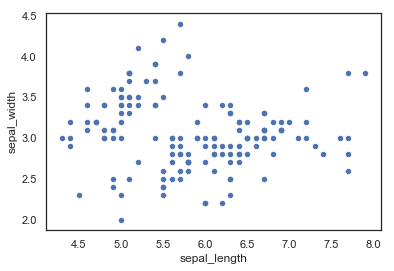

In [53]:
iris.plot(kind="scatter",x="sepal_length",y="sepal_width")

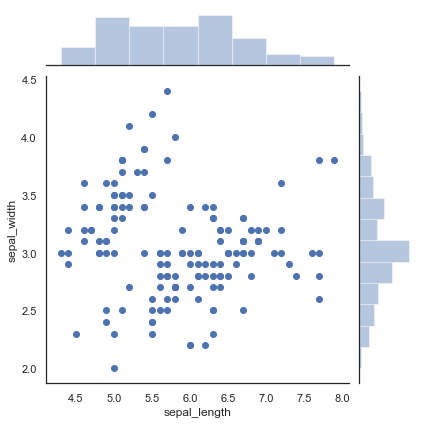

In [54]:
sns.jointplot(x="sepal_length",y="sepal_width",data=iris)

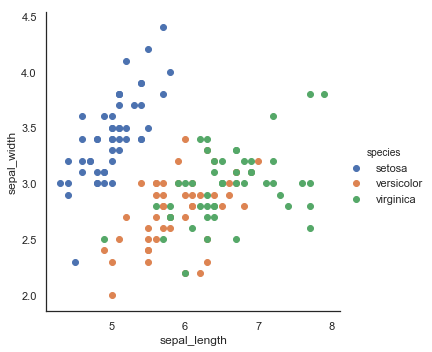

In [55]:
sns.FacetGrid(iris, hue="species",height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

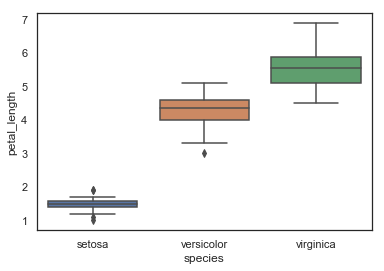

In [57]:
sns.boxplot(x="species",y="petal_length",data=iris)

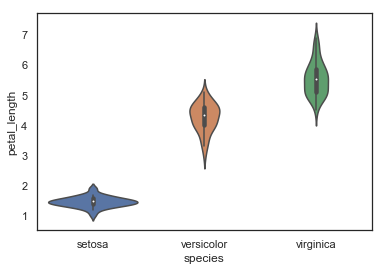

In [59]:
sns.violinplot(x="species",y="petal_length",data=iris)

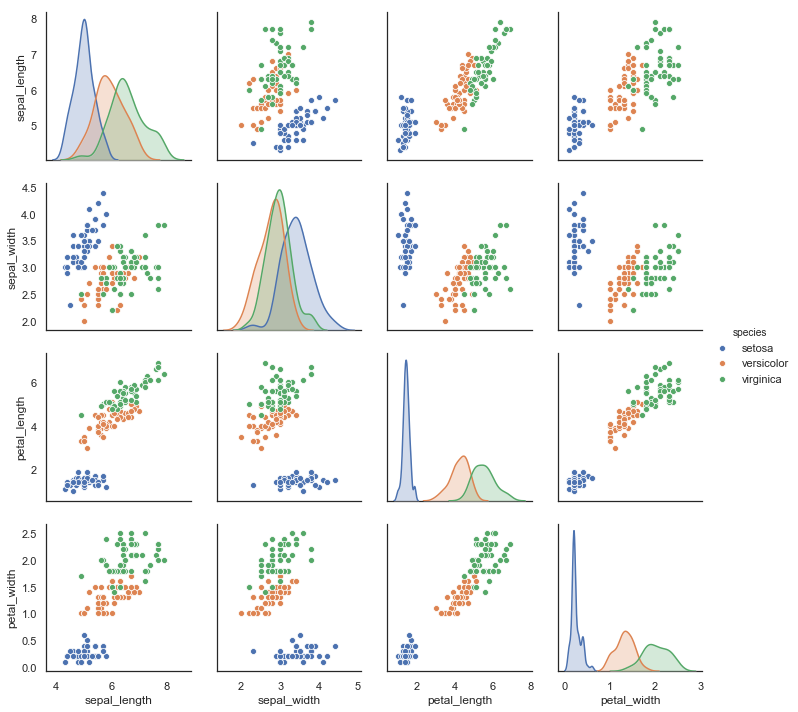

In [60]:
sns.pairplot(iris,hue="species")